# Multiple graphs on one page (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to put multiple graphs on one page.

## Solution
The easy way is to use the `multiplot` function, defined at the bottom of this page. If it isn’t suitable for your needs, you can copy and modify it.

First, set up the plots and store them, but don’t render them yet. The details of these plots aren’t important; all you need to do is store the plot objects in variables.

In [1]:
library(ggplot2)

### multiplot function

This is the definition of multiplot. It can take any number of plot objects as arguments, or if it can take a list of plot objects passed to plotlist.

In [2]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [3]:
# This example uses the ChickWeight dataset, which comes with ggplot2
# First plot
p1 <- ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet, group=Chick)) +
    geom_line() +
    ggtitle("Growth curve for individual chicks")

# Second plot
p2 <- ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet)) +
    geom_point(alpha=.3) +
    geom_smooth(alpha=.2, size=1) +
    ggtitle("Fitted growth curve per diet")

# Third plot
p3 <- ggplot(subset(ChickWeight, Time==21), aes(x=weight, colour=Diet)) +
    geom_density() +
    ggtitle("Final weight, by diet")

# Fourth plot
p4 <- ggplot(subset(ChickWeight, Time==21), aes(x=weight, fill=Diet)) +
    geom_histogram(colour="black", binwidth=50) +
    facet_grid(Diet ~ .) +
    ggtitle("Final weight, by diet") +
    theme(legend.position="none")        # No legend (redundant in this graph)    

Once the plot objects are set up, we can render them with `multiplot`. This will make two columns of graphs:

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


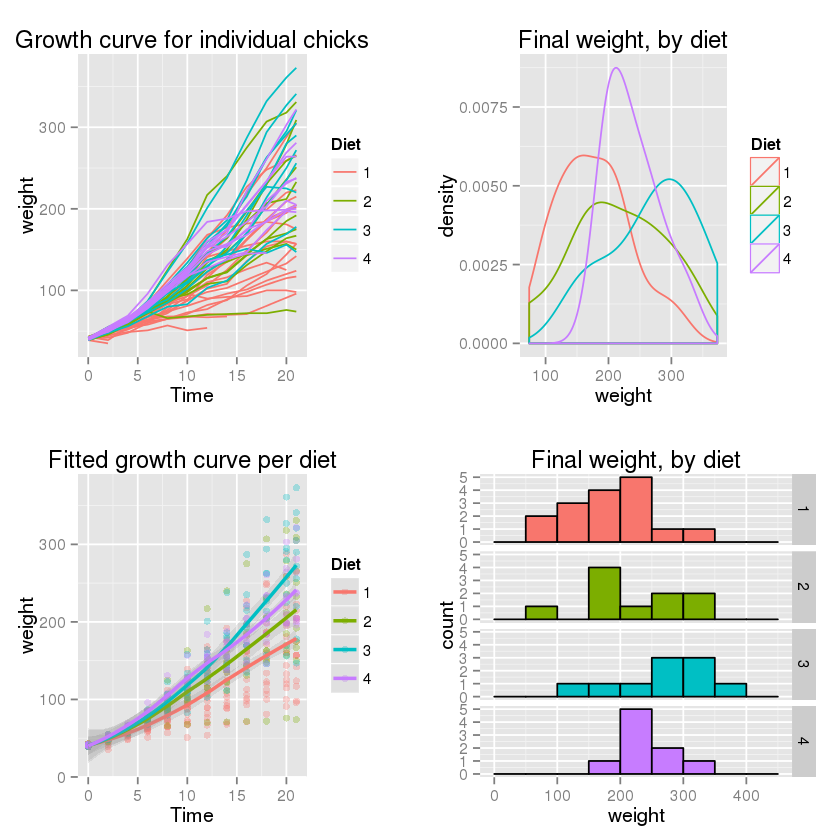

In [4]:
multiplot(p1, p2, p3, p4, cols=2)